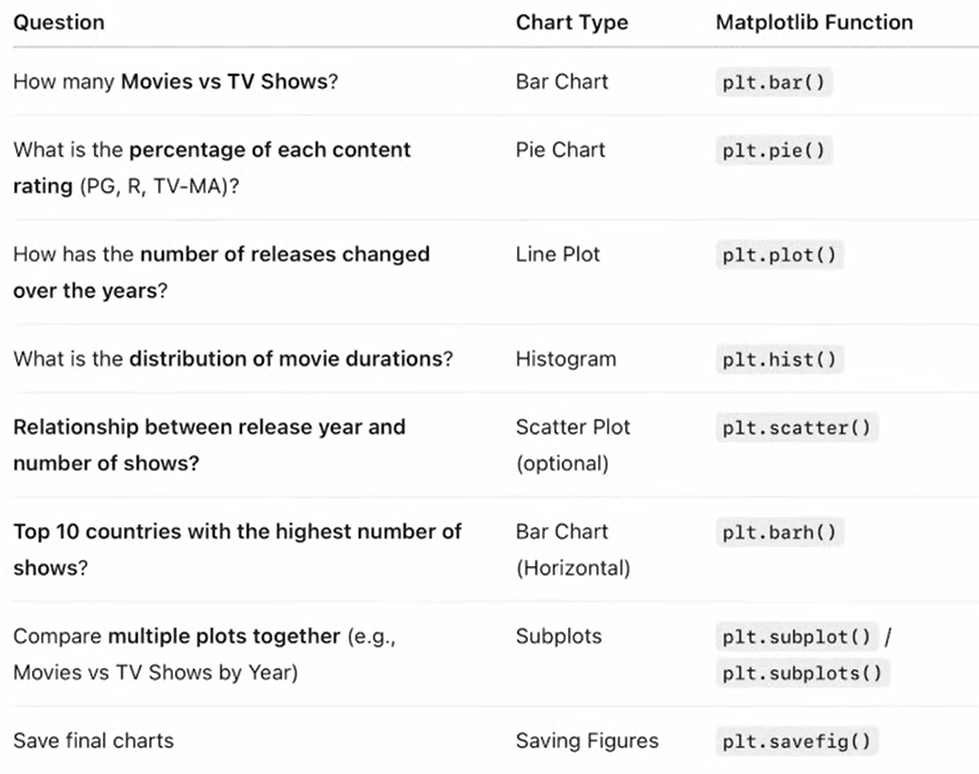

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Codes\Python-Language\Matplotlib\netflix_titles.csv", )
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [27]:
df.dropna(subset=["type", "release_year", "rating", "country", "duration"])


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


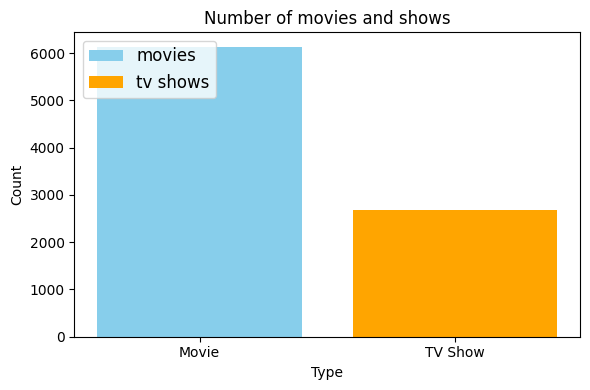

In [28]:
typeCounts = df["type"].value_counts() 
plt.figure(figsize=(6,4))
plt.bar(typeCounts.index, typeCounts.values, color=["skyblue", "orange"], label=["movies", "tv shows"])
plt.title("Number of movies and shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.legend(loc="upper left", fontsize=12)
# plt.grid()
plt.tight_layout()
plt.show()

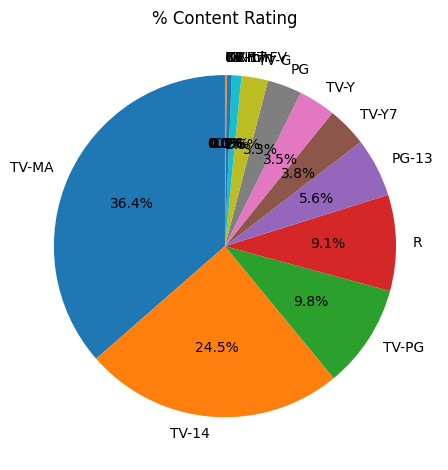

In [29]:
ratingCounts = df["rating"].value_counts()
plt.Figure(figsize=(8,6))
plt.pie(ratingCounts, labels=ratingCounts.index, autopct="%1.1f%%" ,startangle=90)
plt.title("% Content Rating")
plt.tight_layout()
plt .show()


In [30]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


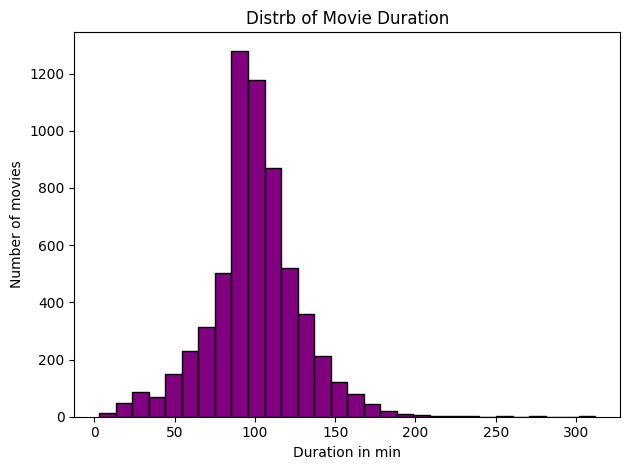

In [33]:
# movie_df = df[df["type"] == "Movie"].copy()
# movie_df["duration_int"] = movie_df["duration"].str.replace(" min", "").astype(int)

movie_df = df[df["type"] == "Movie"].copy()
movie_df = movie_df[movie_df["duration"].notna()]

movie_df["duration_int"] = pd.to_numeric(movie_df["duration"].str.replace(" min", ""), errors='coerce')
movie_df = movie_df.dropna(subset=["duration_int"])
movie_df["duration_int"] = movie_df["duration_int"].astype(int)


plt.Figure(figsize=(8,6))
plt.hist(movie_df["duration_int"], bins=30, color="purple",edgecolor="black")

plt.title("Distrb of Movie Duration")
plt.xlabel("Duration in min")
plt.ylabel("Number of movies")

plt.tight_layout()
plt .show()



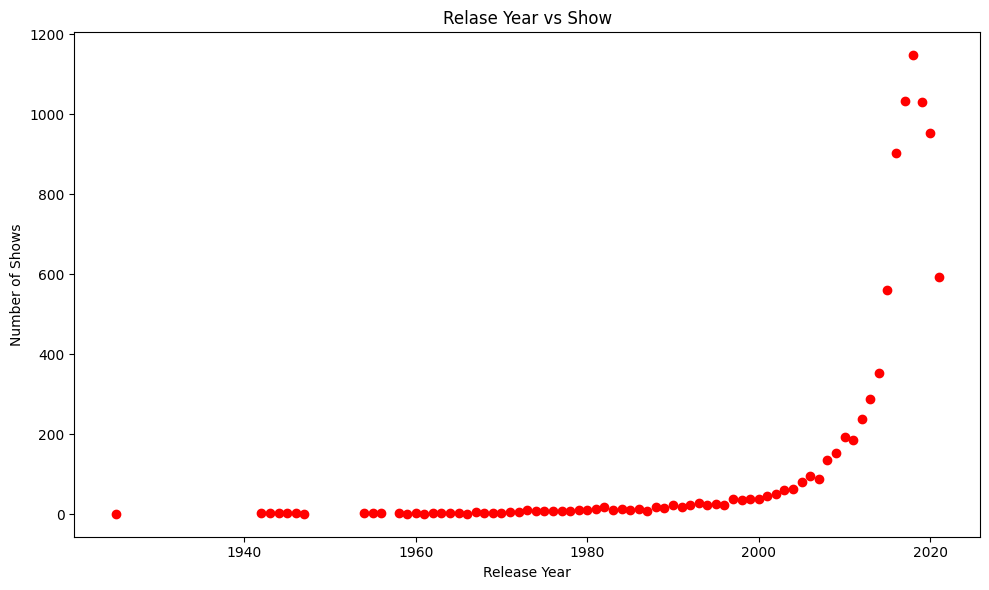

In [35]:
relaseCounts = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(relaseCounts.index, relaseCounts.values, color="red")
plt.title("Relase Year vs Show")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.show()




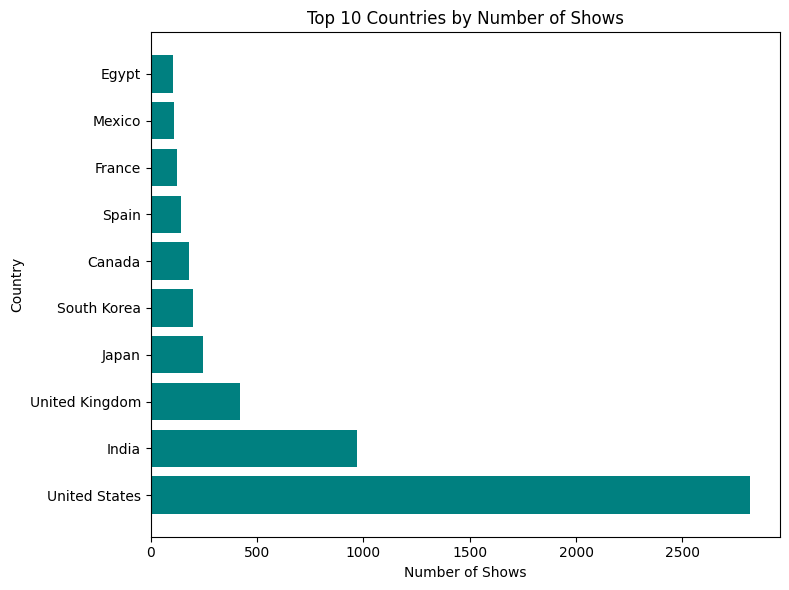

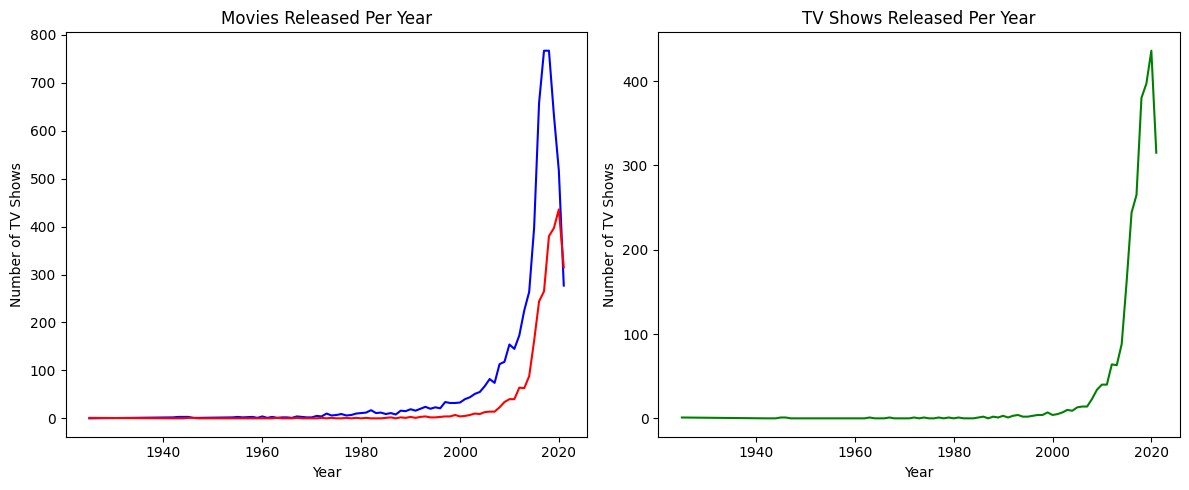

In [38]:
contryCounts = df["country"].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.barh(contryCounts.index, contryCounts.values, color="teal")
plt.title("Top 10 Countries by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

content_by_year = df.groupby(["release_year", "type"]).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Movies plot
ax[0].plot(content_by_year.index, content_by_year["Movie"], color="blue")
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

# TV Shows plot
ax[1].plot(content_by_year.index, content_by_year["TV Show"], color="green")
ax[1].set_title("TV Shows Released Per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of TV Shows")

ax[0].plot(content_by_year.index, content_by_year["TV Show"], color="red")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of TV Shows")

plt.tight_layout()
plt.show()


